# OCR & LINEAR PROPERTIES PREDICTION

In [9]:
from sklearn import tree
# zbiór danych studentów modułu "Uczenie maszynowe w Python"
# pierwsza wartość - frekwencja na zajęciach 1-10
# druga wartość - czy projekt został oddany 0-1
students = [
    [8, 1],
    [9, 1],
    [10, 1],
    [5, 0],
    [10, 1],
    [9, 1],
    [0, 0],
    [8, 0],
    [10, 0],
    [3, 1],
    [10, 1],
    [9, 1],
    [6, 1],
    [10, 1],
    [8, 1],
    [0, 0]
]
whoIsClassified = [1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
clf = tree.DecisionTreeClassifier()
clf.fit(students, whoIsClassified)
clf.predict([[?, ?]]) #zamień ? na 0 lub 1 zgodnie z własnymi preferencjami


array([0])

In [3]:
clf.predict([[10, 0], [130, 1], [150, 0]])

array([0, 1, 0])

In [4]:
clf.predict([[140, 1], [70, 1]])

array([1, 1])

In [5]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_test = [0, 1, 0, 0, 0]
y_pred = [0, 1, 0, 1, 1]

print(precision_recall_fscore_support(y_test, y_pred, average='binary'))

(0.3333333333333333, 1.0, 0.5, None)


In [7]:
print(confusion_matrix(y_test,y_pred))  

[[2 2]
 [0 1]]


In [8]:
print(classification_report(y_test,y_pred))  

             precision    recall  f1-score   support

          0       1.00      0.50      0.67         4
          1       0.33      1.00      0.50         1

avg / total       0.87      0.60      0.63         5



In [9]:
print(accuracy_score(y_test, y_pred))  

0.6


OCR EXAMPLE

In [10]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

digits['images'][0]

Automatically created module for IPython interactive environment


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
digits['target'][0]

0

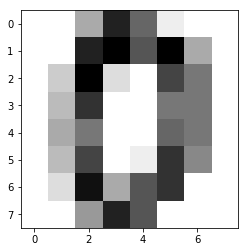

In [12]:
plt.imshow(digits['images'][0], cmap=plt.cm.gray_r, interpolation='nearest')

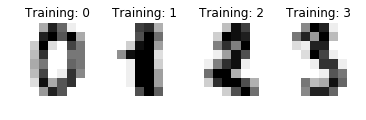

In [13]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [14]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [15]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

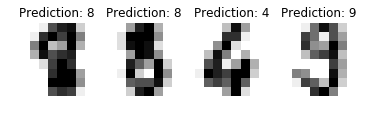

In [18]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [20]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC(gamma=0.001)
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)


import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
predicted = clf2.predict(X[0:1])
predicted == y[0]

array([ True])

In [21]:

import numpy as np
from sklearn.svm import SVC

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)

clf = SVC()
clf.set_params(kernel='linear').fit(X, y) 

clf.predict(X_test)


array([1, 0, 1, 1, 0])

REGRESSION EXAMPLE

In [ ]:
clf.set_params(kernel='rbf', gamma=0.001).fit(X, y)  

clf.predict(X_test)

In [ ]:
import sklearn.linear_model

# uzupełnij tutaj
# 1. Pobierz zawartość winequality-all.txt
# 2. Przypisz do X kolumny "fixed.acidity","volatile.acidity","citric.acid","residual.sugar","chlorides","free.sulfur.dioxide","total.sulfur.dioxide","density","pH","sulphates","alcohol","color"
# 3. Przypisz do y kolumnę  "response" 

mnk = sklearn.linear_model.LinearRegression()
mnk.fit(X, y)
mnk.predict(X.mean().reshape(1, -1)) #średnie wino

In [ ]:
import sklearn.cross_validation
import sklearn.preprocessing

# uzupełnij tutaj
# 1. Pobierz zawartość winequality-all.txt
# 2. Przypisz do X kolumny "fixed.acidity","volatile.acidity","citric.acid","residual.sugar","chlorides","free.sulfur.dioxide","total.sulfur.dioxide","density","pH","sulphates","alcohol","color"
# 3. Przypisz do y kolumnę  "response" 

X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, test_size=0.2, random_state=12345) 

p2 = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X2_train = p2.fit_transform(X_train)
X2_test = p2.fit_transform(X_test)
r = sklearn.linear_model.LinearRegression()
r.fit(X2_train, y_train)
y_train_pred = r.predict(X2_train)
y_test_pred = r.predict(X2_test)


mse = sklearn.metrics.mean_squared_error
mae = sklearn.metrics.mean_absolute_error

/usr/share/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/share/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/share/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/share/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
NeuralNet: 0.9919971585273742
KNN: 0.9919933559848813
SVC: 0.9570479662626555
GaussianProcess: 0.993379869241451
DecisionTree: 0.9798314413144922
RandomForest: 0.9882982000213639
MLP: 0.9918409336008205


TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Please change the base estimator or set algorithm='SAMME' instead.

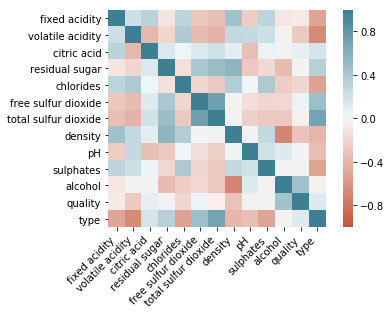

In [22]:
# code from https://github.com/gzcharleszhang/wine-quality-prediction
# Author: gzcharleszhang
    
from tensorflow import keras
from sklearn.model_selection import cross_val_score, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

feature_names = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality",
]

interested_features = [
    "fixed acidity",
    "volatile acidity",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "sulphates",
]

red_wine_data = pd.read_csv('winequality-red.csv',
                            names=feature_names, sep=";", header=1)
white_wine_data = pd.read_csv(
    'winequality-white.csv', names=feature_names, sep=";", header=1)

red_wine_data['type'] = 0
white_wine_data['type'] = 1

wine_data = red_wine_data.append(white_wine_data)
wine_features = wine_data[interested_features].values
wine_type = wine_data['type'].values

scaler = StandardScaler().fit(wine_features)
wine_features = scaler.transform(wine_features)

corr = wine_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
# plt.show()


def base_model():
    model = Sequential()
    model.add(Dense(512, input_dim=len(interested_features),
                    kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model


models = []
estimator = KerasClassifier(build_fn=base_model,
                            nb_epoch=100, verbose=0)
models.append(('NeuralNet', estimator))
models.append(('KNN', KNeighborsClassifier(3)))
models.append(('SVC', SVC(gamma=2, C=1)))
models.append(('GaussianProcess', GaussianProcessClassifier(1.0 * RBF(1.0))))
models.append(('DecisionTree', DecisionTreeClassifier(max_depth=5)))
models.append(('RandomForest', RandomForestClassifier(max_depth=5)))
models.append(('MLP', MLPClassifier(alpha=1, max_iter=1000)))
models.append(('AdaBoost', AdaBoostClassifier(3)))
models.append(('GaussianNB', GaussianNB(3)))
models.append(('QuadraticDiscrimination', QuadraticDiscriminantAnalysis()))


for name, model in models:
    results = cross_val_score(model, wine_features, wine_type, cv=10)
    print("{}: {}".format(name, results.mean()))